This paper is studying the validity of the "conservation niche hypothesis" which is that enviornment/evolutionary niches are stable over time. In this study, they synthesize the results of a bunch of papers, each paper examining an invasive species and comparing its invasive niche with its native niche to test for similarity. The main purpose of this paper is to show that niche conservation varies between species, which shows that the niche conservatism hypothesis does not hold as a general "law".



Peer comments: Peers commented I did not adequatly predict the outcome of the describe function, I added predictions. Peers also commented that I did no justify my plots, I added justification.

1: Data and Research questions:
Paper link:
https://www.pnas.org/doi/10.1073/pnas.2004289117

Before I describe the data and how it relates to the research question, allow me to first explain the authors research question.

	Currently, there is ambiguity over the validity of the ecological niche conservation hypothesis. The idea that ecological niches are conserved over time is a fundamental assumption for a variety of ecological niche modelling approaches. As these ecological niche models are used to inform both conservation efforts and climate change models, it is important that ecological niche models accurately model the stability of ecological niches over time. But, interestingly the authors cite multiple studies with results that directly contradict or support the ecological niche conservation hypothesis, depending on which model of ecological niches they use.
	The paper is a meta-analysis of a collection of these studies, investigating the role of statistical model and author bias in their support or criticism of the evolutionary niche conservation hypothesis, as well as performing a synthetic meta-analysis of the results of the papers studied, in order to assess the ecological niche conservation of different species across different climates directly using a cutting edge model approach.

Description of the data:
Though the studies collected by the authors are diverse, they all contain a comparison of observations of a species in its native and invasive habitat. Though from the perspective of the meta-analysis, it consists of 86 papers/observations. From each, they extracted:
•	Author/paper information
•	Species/ native and non-native occurrences/ native and non native continents/ intentionality and year of introduction
•	details of modelling technique used by the authors, relevant parameters informing niche model (including niche breadth, relevant predictors used by the author
•	conclusion of the author over if ecological niches conserve over time
•	conclusion of the entire study if the niche conserved over time
The observations were each paper, the features: the model technique used, the parameters used for the model, and results of that paper. There are 43 features in total.


Relating the data to the research question
	This data relates to the research question in two ways, first it allows for the investigators to assess the role of author and statistical model selected in the upholding of the niche conservatism hypothesis. Second, it allows the authors of this study to synthesize the results of these studies with their cutting edge model to pass judgement on the niche conservatism hypothesis. Especially the difference of niche dynamics between invasive and native clades, as well as between species groups.
	An additional question I could ask with this data is relating non-native niche success to the intentionality of introduction/year of introduction. The hypothesis being, if a species was unintentionally introduced at an early year, it is likely that it is because they will find more extreme competitive success respective to native species. If a species was introduced at a later year, it is unlikely they have the extreme evolutionary success of the notorious invasives.

2: Visualizations

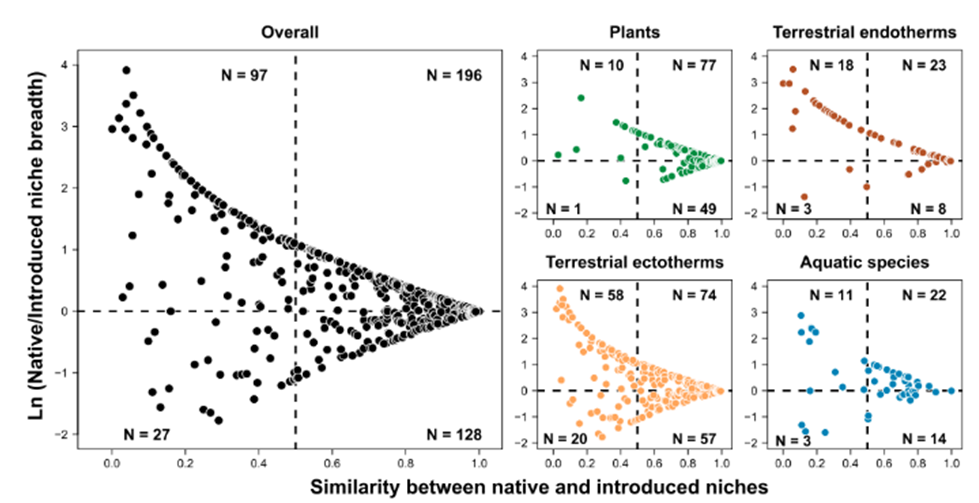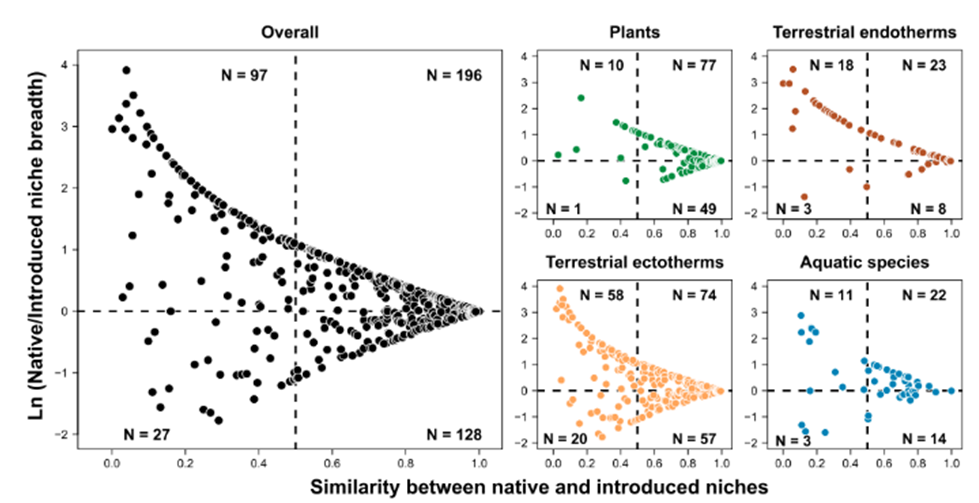
This shows the similarity between native and non-native niches on the x axis, and the natural log of the ratio between the “niche breadth” of those niches between native and non-native clades. Niche breadth is measured as the % of environmental niche that is realized by the species. The “possible” environmental niche is always larger than the realized niche of organisms. A ratio of niche breath larger than 0 shows that the native niche is larger than the non-native niche, if its negative than the native niche is smaller. A niche similarity larger than .5 shows these two niches occupy similar positions in environmental space. The similarity of niches is determined by the Sorsen similarity index.
	Each data point Each dot is a species with native and invasive clades. 
	The authors break up this plot into a composite of all species on the left, and plots to the right split up into taxonomic groups.
	Zooming back out to the overall framing of this paper, this figure was included because it allows a characterization of the relation between "changes in niche" and "niche similarity", a relation extremely important to the characterization of niches in the context of climate change. If differences in invasive/native niche similarity is taken to be comparable to changing environmental conditions of course. As niche similarity becomes lower, a difference in ratio between niche breadth emerges. This is what explains the V shapes in the graph. If we look to the taxa group plot to the left, it is clear that different taxa groups exhibit different niche breadth dynamics as native and non-native niches become less similar.
	This contributes to the authors hypothesis because this leads to the conclusion that niche conservation over time is related to the taxa groups, as niche similarity takes on a temporal significance in this larger context.

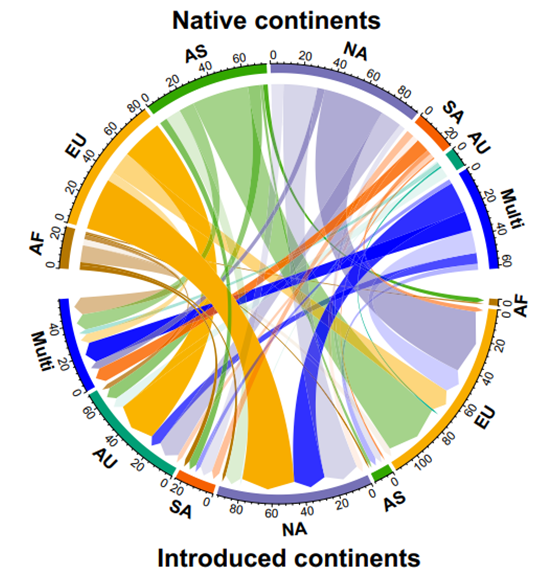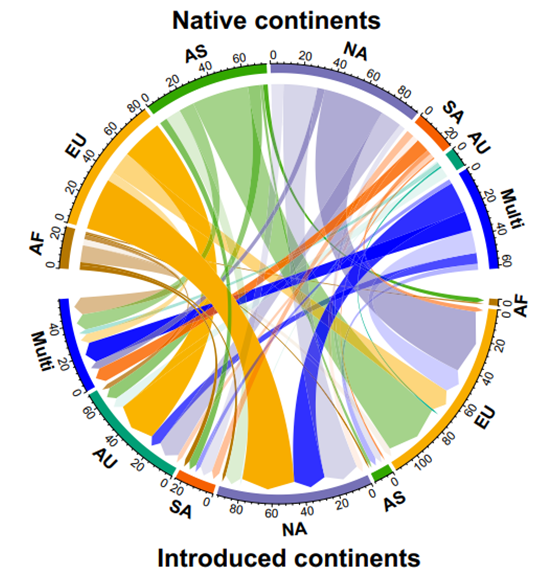

 
This plot shows Niche similarity for species introduced between different continents. The continents on the top representing the native continent of each species, the bottom the introduced niche. The width of each arrow represents the number of species that are introduced. The transparency of each arrow represents the average niche similarity across all species within that arrow.
	As for how this contributes to the author’s hypothesis, it allows for broad inference about the structure of climatic niches globally. The niche similarity between species invasive to NA or AU from the EU is much higher than the niche similarity of species introduced from NA or AU to the EU. It shows the dynamics of climatic niches was not symmetrical across continents.

A figure that may be useful to add:
They have no figure showing a distinctive role of the statistical model used by researchers correlated to the conclusions of those studies. There is also no figure showing the diversity of the species that makeup these taxanomic groups. This study can be interpreted as investigating the biasing roles of models and author leanings in prediction of environmental niche conservation. It would be useful to add a dot plot figure showing a # of species observed on the y and if niche conservation was upheld in the study on the x. Like this (I apologize for the terrible):








This would attempt to show the role of something like sampling bias behind conservation or no conservation decisions, as currently they just allude to its role but show no plots describing it.

3: downloaded files:
I downloaded 4 files, first a readme containing a brief description of the files I downloaded. Very handy.
Second: an xslx file named “name_match_R_MS” which has is metadata for the dataset describing what each of the column names mean.
Third, the main dataset, an xlsx file named “PNAS_Lui_DatasetS1” with 927 Rows and 40 columns. This contains all the papers and the species they mention, and the models they use.
The last file is a zip file that contains all the R code used to generate the figures.


In [3]:
#must !pip install openpyxl
import seaborn as sns
import pandas as pd
previous_col = ''
i = 0
df = pd.read_excel("PNAS_Liu_DatasetS1.xlsx")


#the major problem is that there are 2 headers: headers and subheaders in the excel file.
#In the dataframe, the columns are the headers and the first row contains subheadings. 
#I need to merge these headings so that they are just column names containing both headers
# to do this, I iterate through all the columns, and the columns with subheaders have 
#"unnamed" column names. So I detect this with a for loop, and the most recent header is 
# merged with the subheader and stored in the first row.
#the column names are then set to the first row, and first row deleted.
#but the first row with the header name is not "unnamed" and so it is lost in this operation
#so I just brute forced the cases not covered by my
#code by rewriting columns with the "except_dict" dictionary
# there is likly a more elegant solution that involves overwriting the unnamed columns 
#with the header before the 2 are merged, but this works.

except_dict = { 
            'Assessment of niche overlap':'Assessment of niche overlap: Technique',
            'Niche equivalence test':'Niche equivalence test: Technique',
            'Niche similarity test':'Niche similarity test: Technique',        
            'Niche dynamics estimated by the COUE scheme':'Niche dynamics estimated by the COUE scheme: Non-analogous environments',
            'Transformed dynamic values':'Transformed dynamic values: PropE', 
}
df.rename(columns = except_dict, inplace = True)

for col in df.columns:
    
    #because the proper header is in the col directly before the cols with the subheader,
    # this is the major head and connected with the subhead down below
    
    if 'Unnamed' not in col:# the columns that contain a subheading have 'unnamed' as a col
        previous_col = col.strip(': Technique')# most recent non-unnamed header is stored
        previous_col = previous_col.strip(': Non-analogous environments')# these are to clean the brute force
        previous_col = previous_col.strip(': PropE')
        df.loc[0,col] = col
    else:
        df.loc[0,col] = previous_col+':'+df.loc[0,col]#major head and subhead in row 0


#now migrate the subheadings to the header and get rid of the first column
i = 0
#print(df.columns)

for col in df.columns:
    
    df.rename(columns = {col:df.loc[0,col]}, inplace = True)#writes subheader to header
df = df.iloc[1:,:]#this gets rid of subheader row
print(df.head(5))
#

                                           Author(s)    Year  \
1  Ancillotto, L., Strubbe, D., Menchetti, M. & M...  2016.0   
2  Ancillotto, L., Strubbe, D., Menchetti, M. & M...  2016.0   
3         Angetter, L.-S., Lotters, S., & Rodder, D.  2011.0   
4        Banerjee, A.K., Mukherjee, A. & Dewanji, A.  2017.0   
5        Banerjee, A.K., Mukherjee, A. & Dewanji, A.  2017.0   

                                               Title  \
1  An overlooked invader? Ecological niche, invas...   
2  An overlooked invader? Ecological niche, invas...   
3  Climate niche shift in invasive species: the c...   
4  Potential distribution of Mikania micrantha Ku...   
5  Potential distribution of Mikania micrantha Ku...   

                                     Journal              Species  \
1                       Biological Invasions  Psittacula eupatria   
2                       Biological Invasions  Psittacula eupatria   
3  Biological Journal of the Linnean Society        Anolis sagrei   
4 

C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_23016\1308690621.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Year' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col] = col
C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_23016\1308690621.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Year of introduction' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col] = col
C:\Users\S_AngelliNichols\AppData\Local\Temp\ipykernel_23016\1308690621.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '# Native occurrences' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,col]

In [4]:

print(df.shape)
#this df is 925 rows and is the # of papers (86) times the number of species menioned 
#in each paper. So because different papers mentions different numbers of species, the math
#isnt clean

(925, 40)


In [5]:
# I will focus on taxonomic group and intentionality of introduction
#the describe function for taxonomic group will give me the count and the most frequent 
#and its frequency between all species. there are 13 groups 
#The most frequent is probably plants there are observations for for every record.
#frequency of 300
print(df['Taxonomic group'].describe())
#My predictions were mostly correct, but plants are more prevelant than I expected

#intentionality
#this will give a count of intentional or unintentional, and the most frequent of
#the boolian. There will be one for each observation, 2 unique, and the top will be
#intentional, probably about 450 occurances.
df['Intentionality of introduction'].describe()
# my predictions were correct except there are 3 unique, I dont know what the third is.

count        925
unique        13
top       Plants
freq         471
Name: Taxonomic group, dtype: object


count             925
unique              3
top       Intentional
freq              493
Name: Intentionality of introduction, dtype: object

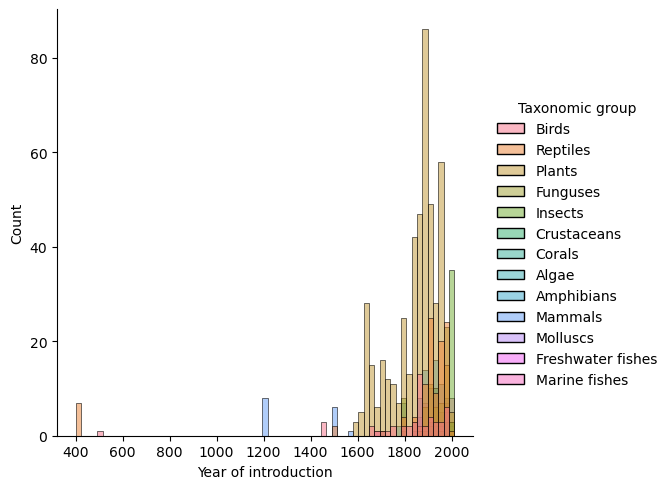

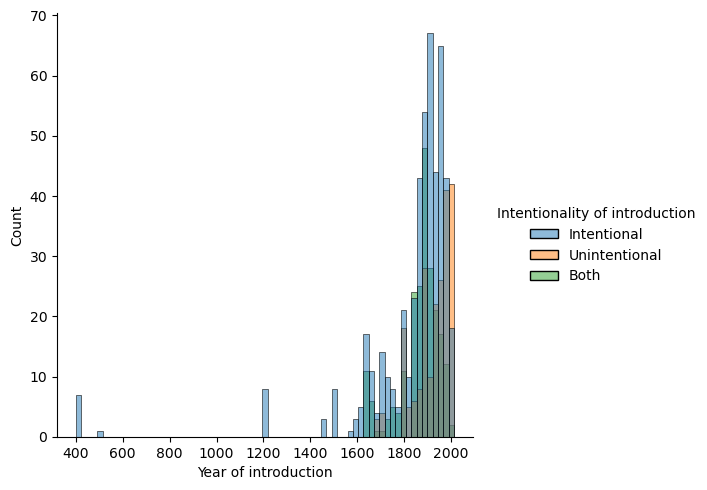

In [6]:
# I was interested in the relation between taxonomic group and year of introduction in
#their sample. The thought being, plants take longer to be introduced than more "mobile"
#organisms. A histogram displays the relative counts of different species well.
#To show this I wanted a histogram where I made the hues the taxonomic group
# of the species, and plotted the year of introduction on the x. T
sns.displot(data=df, hue= 'Taxonomic group', x ='Year of introduction')
#with this visudalization you can clearly see the extreme over representation of plants
# This also shows that quite a bit of plants were introduced in the mid 1800s.
# but also it can be observed that there introduction occured with much higher frequency
#this is inline with the describe function in the previous part, where plants were the most
# common taxonomic group.
#this relates to a hypothesis of the paper because plants are very different from organismal
# conception of niches. More or less stable, this over representation shows a biasing
# role. THis relates to the describe function because it shows just how many plants
#are present compared to other categories

# I was also interested in if unintentional introductions occured earlier than intentional
#introductions. This plot shows a histogram of year of introduction with a hue of 
#intentionality of introduction. This is the correct plot because it shows when the 
#animals were introduced, and trends in intentionality or unintentionality of introduction
# in the sample population.
sns.displot(data = df, x = 'Year of introduction',hue = 'Intentionality of introduction')
# This plot shows that in the study population, most invasive organisms were intentionally
#introduced. This relates to the hypothesis of the authors as unintentional interactions
# have become more frequent as time has gone on. The distance between time of introduction
# and modern day niche difference plays a major role in thier analysis, and this trend
# could mean that all unintentional introductions they study have not had the chance to 
# diverge. This also shows just how prevalent intentional introduction is to the other 
# two cases, as shown in the describe function